# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I.Model Capacity
  * import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

In [4]:
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


  * 산점도(surface_area vs. electricity)

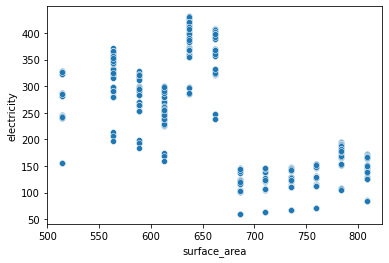

In [6]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

# 1) 1차 모델 시각화

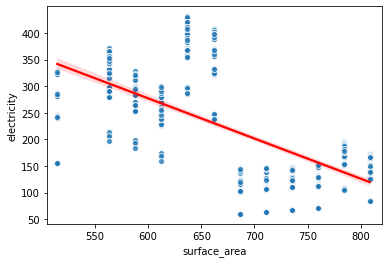

In [7]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

# 2) 2차 모델 시각화

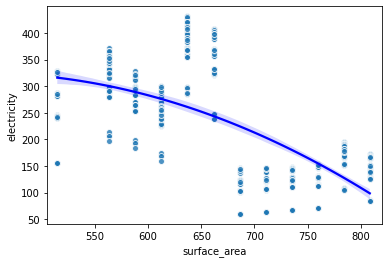

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

# 3) 5차 모델 시각화

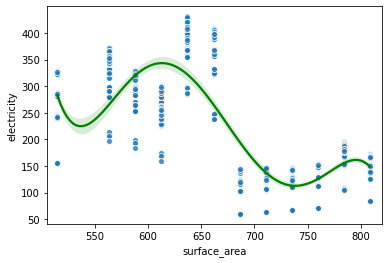

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

# 4) 9차 모델 시각화

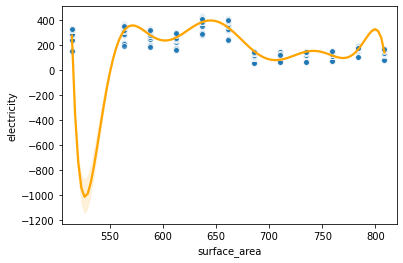

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'orange'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 9)
plt.xlim(505, 820)
plt.show()

# 5) 4개 모델 비교 시각화

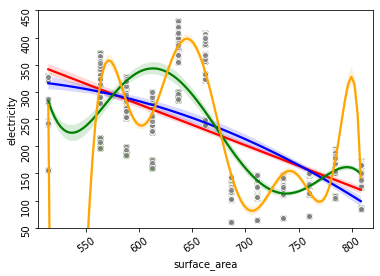

In [11]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color' : 'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color' : 'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color' : 'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color' : 'orange'}, order = 9,
            scatter_kws = {'color' : 'gray', 'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# 6) ipywidgets Package
  * reg_plot() 선언

In [12]:
def reg_plot(x):
  sns.regplot(x = 'surface_area',
               y = 'electricity',
               data = Elec,
               order = x,
               line_kws = {'color':'red'},
               scatter_kws = {'edgecolor' : 'white'})
  plt.xlim(505, 820)
  plt.ylim(50, 450)
  plt.show()

* interact() 실행

In [13]:
from ipywidgets import interact

In [14]:
order = [1, 2, 5, 9]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9), value=1), Output()), _dom_classes=('widg…

<function __main__.reg_plot>

# II. Training Error
  * import packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

In [17]:
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# 1) 1차 모델 Training Error
  * X_train and y_xtrain

In [18]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

In [19]:
X_train.shape, y_train.shape

((768, 1), (768,))

* 모델 생성

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [22]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


* y_hat(예측값) 생성

In [23]:
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [24]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426347

# 2) 5차 모델 Training Error
  * X 다항차수 변환
    * (768,1) to (768,5)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly  = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [27]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

* 5차 모델 생성

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [30]:
np.set_printoptions(suppress = True, precision = 10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


* Y_hat(예측값) 생성

In [31]:
PX_5_pred = poly.fit_transform(X_train)

In [32]:
y_hat_5 = Model_5.predict(PX_5_pred)

In [33]:
y_hat_5.shape

(768,)

* MSE(Mean Squared Error) 계산

In [34]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328606075

# 3) 9차 모델 Training Error
  * X 다항차수 변환
    * (768,1) 새 (768,9)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly  = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

X_train.shape, PX_9.shape

((768, 1), (768, 9))

* 모델 생성

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [39]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


* y_hat(예측값) 생성

In [40]:
PX_9_pred = poly.fit_transform(X_train)

In [41]:
y_hat_9 = Model_9.predict(PX_9_pred)

In [42]:
y_hat_9.shape

(768,)

In [43]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908150374

# 4) 3개 모델 Training Error 비교

In [44]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328606075
9차 모델 :  4086.7199908150374


# 5) 잔차(residual) 시각화
  * 1차 모델

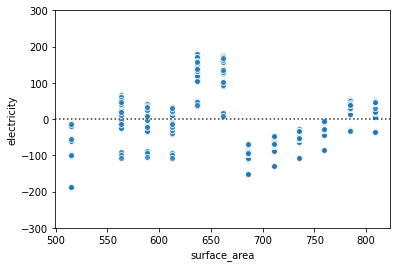

In [45]:
sns.residplot( x = 'surface_area',
              y = 'electricity',
              data = Elec,
              order = 1,
              scatter_kws={'edgecolor' : 'white'})
plt.ylim(-300, 300)
plt.show()

  * 5차 모델

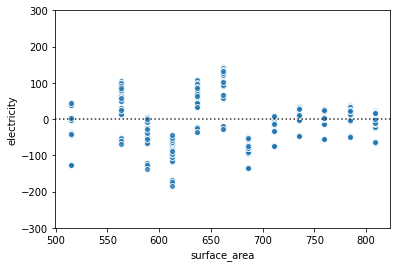

In [46]:
sns.residplot( x = 'surface_area',
              y = 'electricity',
              data = Elec,
              order = 5,
              scatter_kws={'edgecolor' : 'white'})
plt.ylim(-300, 300)
plt.show()

  * 9차 모델

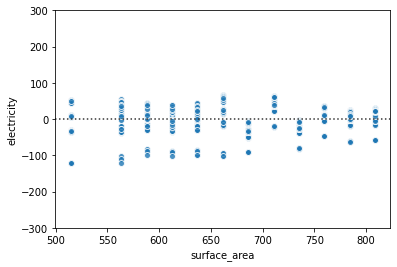

In [47]:
sns.residplot( x = 'surface_area',
              y = 'electricity',
              data = Elec,
              order = 9,
              scatter_kws={'edgecolor' : 'white'})
plt.ylim(-300, 300)
plt.show()

# III. Testing Error

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.shape

(768, 9)

# Train_Data vs. Test_data

 # (1) DataFarm Split
  * 8:2 Split(614, 154)
  * 80% Train_DF & 20% Test_DF

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, random_state = 2045)

In [52]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

* 80% TR_Elec DataFrame

In [53]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


* 20% TE_Elec DataFrame

In [54]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


# (2) Array Split
  * X_train, X_test & y-train, y_test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'],
                                                    test_size = 0.2, random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 1), (614,), (154, 1), (154,))

* 80% X_train Array

In [57]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


* 80% y_train Array

In [58]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

# (3) Distribution Visualization
  * Train Data

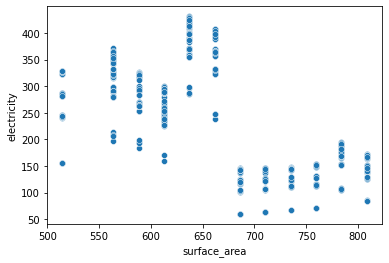

In [59]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

* Test Data

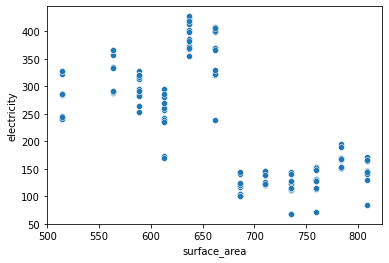

In [60]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

# 1) 1차 모델 Testing Error

In [61]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test_Data로 y_hat(예측값) 생성

In [62]:
y_hat_1 = Model_1.predict(X_test)

In [63]:
y_hat_1.shape

(154,)

  * Test_Data로 MSE(Mean Squared Error) 계산

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

# 2) 5차 모델 Testing Error
  * Train_Data로 모델 생성

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

  * Test_data로 y_hat(예측값) 생성

In [70]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

  * Test_Data로 MSE(Mean Squared Error) 계산

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409499

# 3) 9차 모델 Testing Error
  * Train_Data로 모델 생성

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

  * Test_Data로 y_hat(예측값) 생성

In [77]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

  * Test_Data로 MSE(Mean Squared Error) 계산

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

# 4) 3개 모델 Testing Error 비교

In [80]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409499
9차 모델 :  4238.689067137633


# IV. Validation Approach

In [81]:
import pandas as pd

In [82]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> Train vs. Validation vs. Test
  * 6:2:2 Split(462:153:153)

> sklearn Package 사용
  * train_test_split()

* 20% Test_data(153)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'],
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

In [85]:
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

In [87]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


# 1) 5차 모델 Validation Error
  * Train_Data로 모델 생성

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [92]:
PX_5_VD = poly.fit_transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.4312593408395

# 2) 9차 모델 Validation Error
  * Train_Data로 모델 생성

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly = PolynomialFeatures(degree = 9, include_bias= False)
PX_9_TR = poly.fit_transform(X_train)

In [97]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [98]:
PX9_valid = poly.fit_transform(X_valid)

y_hat_9 = Model_9.predict(PX9_valid)

MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124909912

# 3) 2개 모델 Validation Error 비교

In [99]:
print('5차 모델 MSE_5 : ', MSE_5)
print('9차 모델 MSE_9 : ', MSE_9)

5차 모델 MSE_5 :  4136.4312593408395
9차 모델 MSE_9 :  3955.9733124909912


# 4) 최종 9차 모델을 Test_Data에 적용
  * Test_data로 y_hat(예측값) 생성 및 MSE 계산

In [100]:
PX9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.88573210769